In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-advection-traffic)=
# Traffic flow

Have you ever been driving on a highway when you suddenly came upon a traffic jam? Maybe you had to brake harder than you would like to admit, endured a period of bumper-to-bumper progress, and experienced a much more gradual emergence from dense traffic than the abrupt entry into it. The mathematics of this phenomenon are well understood.

Consider a one-dimensional road extending in the $x$ direction. We represent the vehicles by a continuous density function $\rho(x)$.  The flow rate or **flux** of vehicles, expressed as the number of cars per unit time crossing a fixed point on the road, is denoted by $q$. We assume that this flux depends on the local density of cars. It's reasonable to suppose that the flux will be zero when $\rho=0$ (no cars), reach a maximum $q_m$ at some $\rho=\rho_m$, and approach zero again as the density approaches a critical density $\rho_c$. These conditions are met by the model

:::{math}
:label: trafficQ
Q_0(\rho) = \frac{4 q_m \rho_m \rho (\rho-\rho_c) (\rho_m-\rho_c)}{[\rho (\rho_c-2 \rho_m)+\rho_c \rho_m]^2}.
:::

Observations ({cite}`whithamLinearNonlinear1974`, Chapter 3) suggest that good values for a three-lane highway are $\rho_c = 1080$ vehicles per km, $\rho_m=380$ vehicles per km, and $q_m=4500$ vehicles per hour. In addition, we want to account for the fact that drivers anticipate slowing down or speeding up when they perceive changes in density, and therefore use 

$$
q=Q_0(\rho)-\epsilon \rho_x
$$ 

for a small $\epsilon > 0$.

## Conservation laws

```{index} ! conservation law
```
*Conservation laws* play a major role in science and engineering. They are typically statements that matter, energy, momentum, or some other meaningful quantity cannot be created or destroyed. In one dimension they take the form 

:::{math}
:label: conservation
u_t + q_x = 0,
:::

where $u$ represents a conserved quantity and $q$ represents the flux (flow rate) of $u.$ Using this in our traffic flow, we arrive at the evolutionary PDE

:::{math}
  :label: trafficpde
  \rho_t + Q_0'(\rho) \rho_x = \epsilon \rho_{xx}.
:::

Note that $Q_0'$ has the dimensions of (cars per time) over (cars per length), or length over time. We recognize the first and last terms as indicative of diffusion, but the middle term has a different effect. A similar term appears in the Black–Scholes equation. 

## Advection equation

Let's momentarily consider a simpler, more fundamental PDE.

```{index} ! advection equation, ! hyperbolic PDE
```
::::{proof:definition} Advection equation
The **advection equation** in one dimension is

:::{math}
  :label: advectpde
  u_t + cu_x = 0,
:::

where $c$ is constant.
::::

The advection equation is the archetype of a **hyperbolic PDE**, which is a separate class from the parabolic PDEs. By comparison with {eq}`conservation`, we can interpret {eq}`advectpde` as having a flux proportional to the gradient.

It's easy to produce a solution of {eq}`advectpde`. Let $u(t,x)=\psi(x-c t)$, where $\psi$ is any differentiable function of one variable. Then the chain rule says that

$$
u_t + cu_x = \psi'(x-c t)\cdot(-c)  + c [\psi'(x-c t)] = 0,
$$

and the PDE is satisfied. The form of the solution tells us that $u$ remains constant along any path with $x-c t=a$ for a constant $a$, i.e., $x=a + c t$. So if $c>0$, a fixed value of $u$ moves rightward with speed $|c|$, and if $c<0$, it moves leftward with speed $|c|$.  

::::{proof:observation}
Solutions to the advection equation propagates with constant speed and fixed shape.
::::

We can solve {eq}`advectpde` by the method of lines as in [Chapter 11](../diffusion/overview). We need the second-order first-derivative matrix for periodic end conditions,

:::{math}
  :label: trafficdiffmat
  \mathbf{D}_x =
 \frac{1}{2h}
    \begin{bmatrix}
      0 & 1 & & & -1 \\
      -1 & 0 & 1 & & \\
      & \ddots & \ddots & \ddots & \\
      & & -1 & 0 & 1 \\
      1 & & & -1 & 0
    \end{bmatrix}.
  :::

This matrix is returned by {numref}`Function {number} <function-diffper>`.

(demo-traffic-advection)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We solve the advection equation on $[-4,4]$ with periodic end conditions using the method of lines. In the following definition we allow the velocity $c$ to be specified as a parameter in the `ODEProblem`.

In [2]:
x,Dₓ,Dₓₓ = FNC.diffper(300,[-4,4]);
f = (u,c,t) -> -c*(Dₓ*u);

The following initial condition isn't mathematically periodic, but the deviation is less than machine precision. We specify RK4 as the solver.

In [3]:
u_init = @. 1 + exp(-3*x^2)
IVP = ODEProblem(f,u_init,(0.,4.),2)
sol = solve(IVP,RK4());

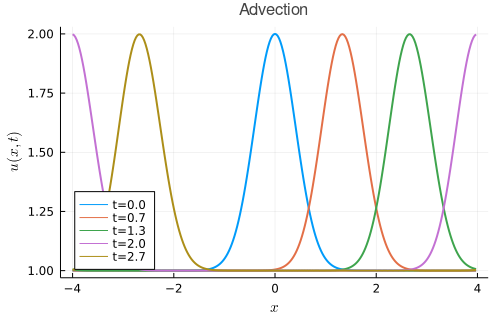

In [4]:
plt = plot(legend=:bottomleft,title="Advection",
    xaxis=(L"x"),yaxis=(L"u(x,t)"))
for t in (0:4)*2/3
    plot!(x,sol(t),label=@sprintf("t=%.1f",t))
end
plt

An animation shows the solution nicely. The bump moves with speed 2 to the right, reentering on the left as it exits to the right because of the periodic conditions.

In [5]:
anim = @animate for t in range(0,4,length=120) 
    plot(x,sol(t),
        xaxis=(L"x"),yaxis=([1,2],L"u(x,t)"),dpi=100,    
        title=@sprintf("Advection equation, t=%.2f",t))
end
mp4(anim,"advection.mp4")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/repos/fnc-julia/advection/advection.mp4
└ @ Plots /Users/driscoll/.julia/packages/Plots/8K4be/src/animation.jl:114


Plots.AnimatedGif("/Users/driscoll/repos/fnc-julia/advection/advection.mp4")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

If you look carefully at {numref}`Demo %s <demo-traffic-advection>`, you'll notice that we used the time integrator `RK4`, a nonstiff method. As we will see later in this chapter, the pure advection equation is not inherently stiff.

## Solutions for traffic flow

```{index} advection-diffusion equation
```
Returning to the traffic flow PDE {eq}`trafficpde`, we can interpret the conservation law as advection at velocity $Q_0'(\rho)$.  The dependence of velocity on the solution is different from the linear PDE {eq}`advectpde` and is the key to the peculiar behavior of traffic jams. In particular, the velocity is low at high density, and higher at low density.  The term on the right side of {eq}`trafficpde` provides a bit of diffusion, and the parameter $\epsilon$ determines the balance between the two effects—advection effects dominate if $\epsilon$ is small.

Exact solutions of {eq}`trafficpde` are much harder to come by than for the standard advection equation, but the method of lines is still effective. 

(demo-traffic-solve)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We solve for traffic flow using periodic boundary conditions. The following are parameters and a function relevant to defining the problem.

In [6]:
ρc = 1080;  ρm = 380;  q_m = 10000;
dQ0 = ρ -> 4q_m*ρc^2*(ρc-ρm)*ρm*(ρm-ρ)/(ρ*(ρc-2*ρm) + ρc*ρm)^3;

Here we create a discretization on $m=800$ points.

In [7]:
x,Dₓ,Dₓₓ = FNC.diffper(800,[0,4]);

Next we define the ODE resulting from the method of lines.

In [8]:
ode = (ρ,ϵ,t) -> -dQ0.(ρ).*(Dₓ*ρ) + ϵ*(Dₓₓ*ρ);

Our first initial condition has moderate density with a small bump. Because of the diffusion present, we use a stiff solver for the IVP.

In [9]:
ρ_init = @. 400 + 10*exp(-20*(x-3)^2)
IVP = ODEProblem(ode,ρ_init,(0.,1.),0.02)
sol = solve(IVP,Rodas4P());

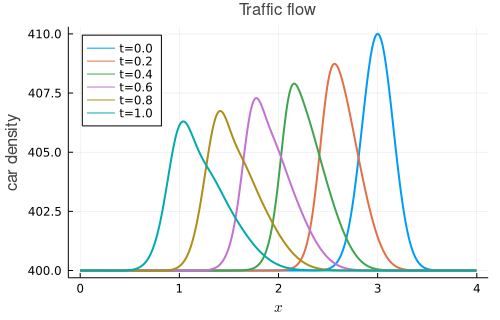

In [10]:
plt = plot(legend=:topleft,title="Traffic flow",
    xaxis=(L"x"),yaxis=("car density"))
for t in 0:0.2:1
    plot!(x,sol(t),label=@sprintf("t=%.1f",t))
end
plt

The bump slowly moves backward on the roadway, spreading out and gradually fading away due to the presence of diffusion.

In [11]:
anim = @animate for t in range(0,0.9,length=91) 
    plot(x,sol(t),
        xaxis=(L"x"),yaxis=([400,410],"density"),dpi=100,    
        title=@sprintf("Traffic flow, t=%.2f",t) )
end
mp4(anim,"traffic-fade.mp4")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/repos/fnc-julia/advection/traffic-fade.mp4
└ @ Plots /Users/driscoll/.julia/packages/Plots/8K4be/src/animation.jl:114


Plots.AnimatedGif("/Users/driscoll/repos/fnc-julia/advection/traffic-fade.mp4")

Now we use an initial condition with a larger bump. Note that the scale on the $y$-axis is much different for this solution.

In [12]:
ρ_init = @. 400 + 80*exp(-16*(x-3)^2)
IVP = ODEProblem(ode,ρ_init,(0.,0.5),0.02)
sol = solve(IVP,Rodas4P());

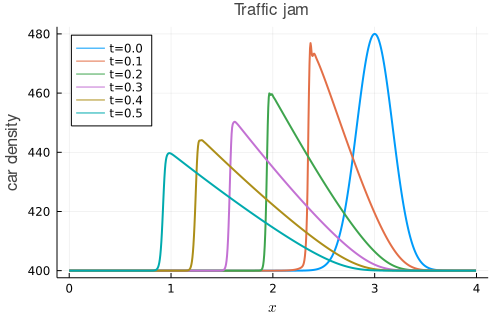

In [13]:
plt = plot(legend=:topleft,title="Traffic jam",
    xaxis=(L"x"),yaxis=("car density"))
for t in (0:5)/10
    plot!(x,sol(t),label=@sprintf("t=%.1f",t))
end
plt

In [14]:
anim = @animate for t in range(0,0.5,length=101) 
    plot(x,sol(t),
        xaxis=(L"x"),yaxis=([400,480],"density"),dpi=100,    
        title=@sprintf("Traffic jam, t=%.2f",t) )
end
mp4(anim,"traffic-jam.mp4")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/repos/fnc-julia/advection/traffic-jam.mp4
└ @ Plots /Users/driscoll/.julia/packages/Plots/8K4be/src/animation.jl:114


Plots.AnimatedGif("/Users/driscoll/repos/fnc-julia/advection/traffic-jam.mp4")

In this case the density bump travels backward along the road. It also steepens on the side facing the incoming traffic and decreases much more slowly on the other side. A motorist would experience this as an abrupt increase in density, followed by a much more gradual decrease in density and resulting gradual increase in speed. (You also see some transient, high-frequency oscillations. These are caused by instabilities, as we discuss in simpler situations later in this chapter.)
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

```{index} shock wave
```

The phenomenon in the second plot of {numref}`Demo %s <demo-traffic-solve>` is called a *shock wave*. The underlying mathematics is not much different from the shock wave that comes off of the wing of a supersonic aircraft in the form of a sonic boom, or from cresting waves under certain conditions in the ocean. In the absence of diffusion ($\epsilon=0$), the shock becomes a jump discontinuity in the solution, which breaks down both the finite differences and the original PDE, requiring different approaches. For many applications, the addition of a small amount of diffusion is appropriate and simple. However, we will first try to come to terms with pure advection in a linear problem.

## Exercises

1. ✍ By the analogy between {eq}`trafficpde` and {eq}`advectpde`, use {eq}`trafficQ` to confirm that constant traffic density moves backward (right to left) for $\rho_m<\rho<\rho_c$, as observed in {numref}`Demo %s <demo-traffic-solve>`. (Note that the derivative of $Q_0$ is given in the code for the example.)

2. ⌨ **(a)** Using as large a discretization and as small a dissipation parameter $\epsilon$  as you can get away with, perform experiments to estimate the speed of the shockwave in {numref}`Demo %s <demo-traffic-solve>` between times $t=0.11$ and $t=0.15$. (Hint: You can use `argmax` to locate the peak of the solution vector at a particular time.)

    **(b)** Theory predicts that the speed of the shockwave is the average of $Q_0'$ evaluated at the values of $\rho$ at the top and bottom of the shock. Perform this calculation and compare to the result of part (a).

    ```{index} Burgers equation
    ```
3. ⌨ The simplest model that includes both diffusion and nonlinear advection is the *viscous Burgers equation*, $u_t+u u_x=\epsilon u_{xx}$. Assume periodic end conditions on $-4\le x < 4$, let $\epsilon=0.04$, and suppose $u(x,0)=e^{-2x^2}$. Solve the problem numerically with $m=200$, plotting the solution on one graph at times $t=0,0.5,1,\ldots,3$. (You should see that the bump decays but also steepens as it moves to the right.)
  
    ```{index} Kuramoto–Sivashinsky equation
    ```
4. ⌨ The *Kuramoto–Sivashinsky equation*, $u_t+u u_x=-u_{xx}-\epsilon u_{xxxx}$, exhibits solutions that are considered chaotic. Assume periodic end conditions, $\epsilon=0.05$, and initial condition $u(x,0)=1+e^{-2x^2}$. Using the method of lines, solve the problem numerically with $m=200$ for $-4\le x \le 4$ and $0\le t \le 20$. (You should discretize the fourth derivative as repeated second derivatives.) Make an animation of the plot (preferred), or plot the solution as a surface over $x$ and $t$. 

5. ⌨ (Adapted from {cite}`trefethenSpectralMethods2000`.) Consider the problem $u_t + c(x) u_x =0$, for $0 \le x \le 2\pi$, with periodic boundary conditions and variable speed $c(x) = 0.2 + \sin^2(x-1)$. This problem has a solution that is $T$-periodic in time, for some $T\approx 13$.

    **(a)** Find this value $T$ accurately to 10 digits by converting the integral $T
    = \int_0^T \,dt$ to an integral in $x$ via $\frac{dx}{dt}=c(x)$, then applying numerical integration.

    **(b)** Using $u(x,0) =e^{\sin x}$, solve the PDE numerically for $0\le t \le T$ using the answer from part (a). Make an animation of the solution, or a surface plot of the solution as a function of $x$ and $t$.
    
    **(c)**  Adjust the accuracy in time and space until you can verify that $\|u(x,T)-u(x,0)\|_\infty < 0.03$.